In [61]:
file = '../../../hex_array.json'

Text(0.5, 1.0, 'Array patch geometry')

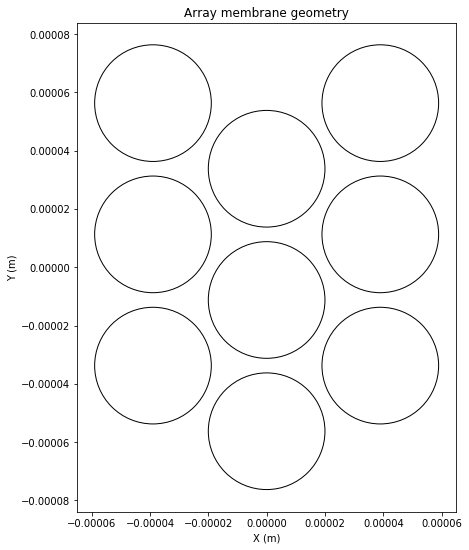

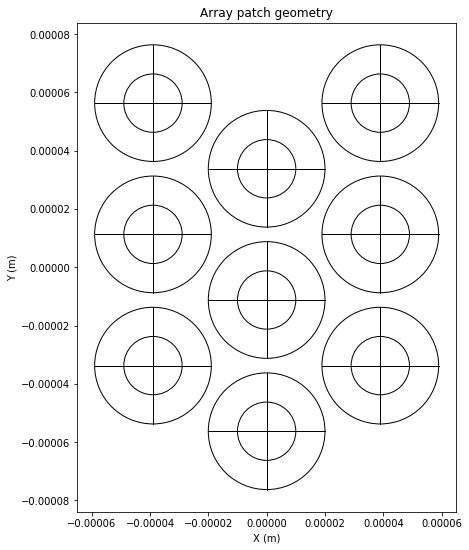

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

from cnld import abstract

array = abstract.load(file)

fig, ax = plt.subplots(figsize=(9,9))

for elem in array.elements:
    for mem in elem.membranes:
        if mem.shape.lower() in ['circle', 'circular', 'c']:
            patch = patches.Circle(radius=mem.radius, xy=(mem.position[0], mem.position[1]), ec='black', fill=False)
        elif mem.shape.lower() in ['square', 's']:
            patch = patches.Rectangle(width=mem.length_x, height=mem.length_y, xy=(mem.position[0], mem.position[1]), 
                                      ec='black', fill=False)
        ax.add_patch(patch)
        
ax.set_aspect('equal')
ax.autoscale()
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Array membrane geometry')

fig, ax = plt.subplots(figsize=(9,9))

for elem in array.elements:
    for mem in elem.membranes:
        for pat in mem.patches:
            if mem.shape.lower() in ['circle', 'circular', 'c']:
       
                arc1 = patches.Arc(width=2*pat.radius_max, height=2*pat.radius_max, xy=(pat.position[0], pat.position[1]),
                               angle=0, theta1=np.rad2deg(pat.theta_min), theta2=np.rad2deg(pat.theta_max), 
                                ec='black', lw=1)
                ax.add_patch(arc1)
                
                x0 = pat.position[0] + pat.radius_min * np.cos(pat.theta_min)
                y0 = pat.position[1] + pat.radius_min * np.sin(pat.theta_min)
                x1 = pat.position[0] + pat.radius_max * np.cos(pat.theta_min)
                y1 = pat.position[1] + pat.radius_max * np.sin(pat.theta_min)
                line0 = plt.Line2D([x0, x1], [y0, y1], c='black', lw=1)
                ax.add_artist(line0)
            
            elif mem.shape.lower() in ['square', 's']:
                
                patch = patches.Rectangle(width=pat.length_x, height=pat.length_y, xy=(pat.position[0], pat.position[1]), 
                                          ec='black', fill=False)
                ax.add_patch(patch)

ax.set_aspect('equal')
ax.autoscale()
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_title('Array patch geometry')